# Analysis of MovieLens dataset (Beginner'sAnalysis)
https://www.kaggle.com/jneupane12/analysis-of-movielens-dataset-beginner-sanalysis

In [1]:
import sys
print(sys.executable)

E:\ProgramData\Anaconda3\python.exe


## 1. First we import necessary Libaries

In [2]:
import pandas as pd # pandas is a data manipulation library
import numpy as np #provides numerical arrays and functions to manipulate the arrays efficiently
import random
import matplotlib.pyplot as plt # data visualization library
import wordcloud #used to generate world cloud
import time
import datetime

## 2.Reading and Exploring the Data

### Load Movies Data

In [3]:
movies = pd.read_csv("datasets/movies.csv")

In [4]:
movies.sample(5)

,movieId,title,genres
2635,3526,Parenthood (1989),Comedy|Drama
5127,8191,Anne of the Thousand Days (1969),Drama
1705,2292,Overnight Delivery (1998),Comedy|Romance
3914,5501,"Master of Disguise, The (2002)",Comedy|Mystery
6869,62553,"Secret Life of Bees, The (2008)",Drama


In [5]:
movies.shape, movies.info(), len(movies['movieId'].unique().tolist())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


((9742, 3), None, 9742)

### Load Ratings Data

In [6]:
ratings = pd.read_csv("datasets/ratings.csv")
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [7]:
ratings.sample(5)

,userId,movieId,rating,timestamp
17266,111,145,4.0,1516155003
34755,232,81156,3.0,1307241965
38184,262,25,3.0,840305912
70406,448,138546,1.5,1450297616
98931,608,1617,3.0,1117407997


In [8]:
ratings.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [9]:
ratings.shape, len(ratings['movieId'].unique().tolist())

((100836, 4), 9724)

### Load Tags Data

In [10]:
tags = pd.read_csv("datasets/tags.csv")

In [11]:
ratings.shape, len(ratings['movieId'].unique().tolist())

((100836, 4), 9724)

In [12]:
tags.sample(5)

,userId,movieId,tag,timestamp
2229,474,7018,Scott Turow,1137375276
1096,474,356,Vietnam,1137375519
1829,474,3675,Christmas,1137205636
716,424,260,classic sci-fi,1457900772
505,184,3793,marvel,1537094366


## 3.Cleaning of data

In [13]:
movies.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

In [14]:
ratings.isnull().any()

userId       False
movieId      False
rating       False
timestamp    False
dtype: bool

In [15]:
tags.isnull().any()

userId       False
movieId      False
tag          False
timestamp    False
dtype: bool

In [16]:
# # lets drop null rows
# tags=tags.dropna()

## 4.Data Analysis

In [17]:
# https://stackoverflow.com/a/62968313/2049763
def timestamp_to_date_converter(t):
    # https://realpython.com/python-time-module/
    return datetime.datetime.fromtimestamp(t).strftime("%A, %B %d, %Y %I:%M:%S")

In [18]:
ratings['date'] = ratings['timestamp'].apply(timestamp_to_date_converter)

In [19]:
ratings.sort_values(by=['timestamp'], ascending=True).tail(5)

,userId,movieId,rating,timestamp,date
81475,514,187031,2.5,1537674927,"Saturday, September 22, 2018 10:55:27"
81477,514,187595,3.0,1537674946,"Saturday, September 22, 2018 10:55:46"
81336,514,5247,2.5,1537757040,"Sunday, September 23, 2018 09:44:00"
81335,514,5246,1.5,1537757059,"Sunday, September 23, 2018 09:44:19"
81092,514,162,4.0,1537799250,"Monday, September 24, 2018 09:27:30"


In [20]:
s = "01/01/2018"
t = time.mktime(datetime.datetime.strptime(s, "%m/%d/%Y").timetuple())

In [21]:
ratings.loc[ratings.timestamp>t].sort_values(by=['timestamp'], ascending=True).head(5)

,userId,movieId,rating,timestamp,date
7181,50,2420,2.5,1514842717,"Monday, January 01, 2018 03:38:37"
7357,50,117529,1.5,1514842744,"Monday, January 01, 2018 03:39:04"
7360,50,122904,1.5,1514891080,"Tuesday, January 02, 2018 05:04:40"
7299,50,72998,2.0,1514891142,"Tuesday, January 02, 2018 05:05:42"
7291,50,63312,2.0,1514891165,"Tuesday, January 02, 2018 05:06:05"


In [22]:
ratings.loc[ratings.timestamp>t].sort_values(by=['timestamp'], ascending=True).shape

(6413, 5)

In [23]:
drama_movies = movies['genres'].str.contains('Drama')
movies[drama_movies].head()

,movieId,title,genres
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
10,11,"American President, The (1995)",Comedy|Drama|Romance
13,14,Nixon (1995),Drama
15,16,Casino (1995),Crime|Drama
16,17,Sense and Sensibility (1995),Drama|Romance


In [24]:
drama_movies.shape

(9742,)

In [25]:
tag_search = tags['tag'].str.contains('Dark', case=False)
len(tag_search)

3683

In [26]:
tags[tag_search].sample()

,userId,movieId,tag,timestamp
122,62,27706,dark comedy,1526248598


In [27]:
movies_ratings_data=movies.merge(ratings, on = 'movieId', how = 'inner')
movies_ratings_data.sample(3)

,movieId,title,genres,userId,rating,timestamp,date
86378,56367,Juno (2007),Comedy|Drama|Romance,241,3.5,1447536448,"Saturday, November 14, 2015 03:27:28"
42137,2329,American History X (1998),Crime|Drama,100,4.0,1100186142,"Thursday, November 11, 2004 09:15:42"
6025,223,Clerks (1994),Comedy,495,4.0,1458635676,"Tuesday, March 22, 2016 03:34:36"


In [28]:
#top 25 most rated movies
most_rated = movies_ratings_data.groupby('title').size().sort_values(ascending=False)
most_rated.head(10)

title
Forrest Gump (1994)                          329
Shawshank Redemption, The (1994)             317
Pulp Fiction (1994)                          307
Silence of the Lambs, The (1991)             279
Matrix, The (1999)                           278
Star Wars: Episode IV - A New Hope (1977)    251
Jurassic Park (1993)                         238
Braveheart (1995)                            237
Terminator 2: Judgment Day (1991)            224
Schindler's List (1993)                      220
dtype: int64

In [29]:
movies_ratings_data.loc[movies_ratings_data.userId == 229].sort_values(by='rating', ascending=True)

,movieId,title,genres,userId,rating,timestamp,date
6713,253,Interview with the Vampire: The Vampire Chroni...,Drama|Horror,229,3.0,836941791,"Tuesday, July 09, 1996 02:49:51"
9928,353,"Crow, The (1994)",Action|Crime|Fantasy|Thriller,229,3.0,838144000,"Tuesday, July 23, 1996 12:46:40"
11631,410,Addams Family Values (1993),Children|Comedy|Fantasy,229,3.0,836942019,"Tuesday, July 09, 1996 02:53:39"
9701,348,Bullets Over Broadway (1994),Comedy,229,3.0,838143659,"Tuesday, July 23, 1996 12:40:59"
12066,434,Cliffhanger (1993),Action|Adventure|Thriller,229,3.0,836942675,"Tuesday, July 09, 1996 03:04:35"
...,...,...,...,...,...,...,...
4132,150,Apollo 13 (1995),Adventure|Drama|IMAX,229,5.0,836941256,"Tuesday, July 09, 1996 02:40:56"
3475,110,Braveheart (1995),Action|Drama|War,229,5.0,836942019,"Tuesday, July 09, 1996 02:53:39"
15732,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,229,5.0,836942292,"Tuesday, July 09, 1996 02:58:12"
1726,34,Babe (1995),Children|Drama,229,5.0,836942064,"Tuesday, July 09, 1996 02:54:24"


### Count and Mean of ratings
https://stackoverflow.com/a/41040158

In [30]:
# userId movieId rating
temp_df = ratings.groupby('movieId').agg({'userId':'count', 'rating':'mean'}).rename(
    columns={'userId':'Lens#Rating','rating':'LensAvgRatings'}).reset_index()
temp_df

,movieId,Lens#Rating,LensAvgRatings
0,1,215,3.920930
1,2,110,3.431818
2,3,52,3.259615
3,4,7,2.357143
4,5,49,3.071429
...,...,...,...
9719,193581,1,4.000000
9720,193583,1,3.500000
9721,193585,1,3.500000
9722,193587,1,3.500000


In [31]:
movies_avg_ratings = movies.merge(temp_df, on = 'movieId', how = 'inner')
movies_avg_ratings.sample(3)

,movieId,title,genres,Lens#Rating,LensAvgRatings
9641,181139,Lynne Koplitz: Hormonal Beast (2017),Comedy,1,1.50
9302,159858,The Conjuring 2 (2016),Horror,2,2.25
4570,6798,Bugsy Malone (1976),Children|Comedy|Crime|Musical,2,2.75


### Distribution

In [32]:
import scipy.stats as st

In [33]:
# https://stackoverflow.com/a/51742444/2049763
def get_best_distribution(data):
    dist_names = ["norm", "exponweib", "weibull_max", "weibull_min", "pareto", "genextreme", 'gamma', 'beta', 'rayleigh']
    
    # https://stackoverflow.com/a/16651955/2049763
    # 'alpha', 'anglit', 'arcsine', 'beta', 'betaprime', 'bradford', 'burr', 'cauchy', 'chi', 'chi2', 'cosine', 'dgamma', 
    # 'dweibull', 'erlang', 'expon', 'exponweib', 'exponpow', 'f', 'fatiguelife', 'fisk', 'foldcauchy', 'foldnorm', 
    # 'frechet_r', 'frechet_l', 'genlogistic', 'genpareto', 'genexpon', 'genextreme', 'gausshyper', 'gamma', 'gengamma', 
    # 'genhalflogistic', 'gilbrat', 'gompertz', 'gumbel_r', 'gumbel_l', 'halfcauchy', 'halflogistic', 'halfnorm', 'hypsecant', 'invgamma', 'invgauss', 'invweibull', 'johnsonsb', 'johnsonsu', 'ksone', 'kstwobign', 'laplace', 'logistic', 'loggamma', 'loglaplace', 'lognorm', 'lomax', 'maxwell', 'mielke', 'nakagami', 'ncx2', 'ncf', 'nct', 'norm', 'pareto', 'pearson3', 'powerlaw', 'powerlognorm', 'powernorm', 'rdist', 'reciprocal', 'rayleigh', 'rice', 'recipinvgauss', 'semicircular', 't', 'triang', 'truncexpon', 'truncnorm', 'tukeylambda', 'uniform', 'vonmises', 'wald', 'weibull_min', 'weibull_max', 'wrapcauchy'
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        param = dist.fit(data)

        params[dist_name] = param
        # Applying the Kolmogorov-Smirnov test
        D, p = st.kstest(data, dist_name, args=param)
        print("p value for "+dist_name+" = "+str(p))
        dist_results.append((dist_name, p))

    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    # store the name of the best fit and its p value

    print("Best fitting distribution: "+str(best_dist))
    print("Best p value: "+ str(best_p))
    print("Parameters for the best fit: "+ str(params[best_dist]))

    return best_dist, best_p, params[best_dist]

In [34]:
get_best_distribution(movies_ratings_data['rating'])

p value for norm = 0.0
p value for exponweib = 0.0
p value for weibull_max = 0.0
p value for weibull_min = 0.0


E:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2429: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


p value for pareto = 0.0
p value for genextreme = 0.0
p value for gamma = 0.0


E:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:621: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


p value for beta = 0.0
p value for rayleigh = 0.0
Best fitting distribution: norm
Best p value: 0.0
Parameters for the best fit: (3.501556983616962, 1.0425240696180562)


('norm', 0.0, (3.501556983616962, 1.0425240696180562))

## 5. Data Visualization

In [35]:
#define a function that counts the number of times each genre appear:
def count_word(df, ref_col, liste):
    keyword_count = dict()
    for s in liste: keyword_count[s] = 0
    for liste_keywords in df[ref_col].str.split('|'):
        if type(liste_keywords) == float and pd.isnull(liste_keywords): continue
        for s in liste_keywords: 
            if pd.notnull(s): keyword_count[s] += 1
    # convert the dictionary in a list to sort the keywords  by frequency
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

In [36]:
def random_color_func(word=None, font_size=None, position=None,
                      orientation=None, font_path=None, random_state=None):
    h = int(360.0 * tone / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)

In [37]:
#here we  make census of the genres:
genre_labels = set()
for s in movies['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))

In [38]:
#counting how many times each of genres occur:
keyword_occurences, dum = count_word(movies, 'genres', genre_labels)
keyword_occurences

[['Drama', 4361],
 ['Comedy', 3756],
 ['Thriller', 1894],
 ['Action', 1828],
 ['Romance', 1596],
 ['Adventure', 1263],
 ['Crime', 1199],
 ['Sci-Fi', 980],
 ['Horror', 978],
 ['Fantasy', 779],
 ['Children', 664],
 ['Animation', 611],
 ['Mystery', 573],
 ['Documentary', 440],
 ['War', 382],
 ['Musical', 334],
 ['Western', 167],
 ['IMAX', 158],
 ['Film-Noir', 87],
 ['(no genres listed)', 34]]

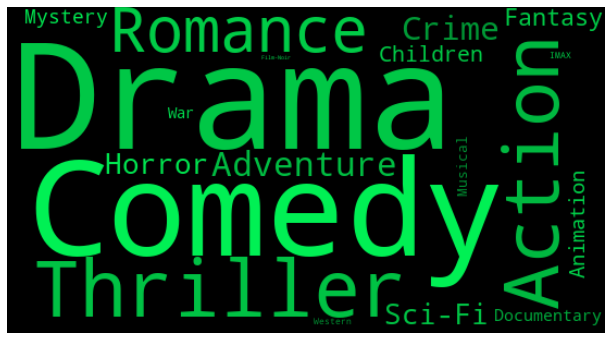

In [39]:
#Finally, the result is shown as a wordcloud:
words = dict()
trunc_occurences = keyword_occurences[0:50]
for s in trunc_occurences:
    words[s[0]] = s[1]
tone = 100 # define the color of the words
f, ax = plt.subplots(figsize=(14, 6))
wordcloud = wordcloud.WordCloud(width=550,height=300, background_color='black', 
                      max_words=1628,relative_scaling=0.7,
                      color_func = random_color_func,
                      normalize_plurals=False)
wordcloud.generate_from_frequencies(words)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

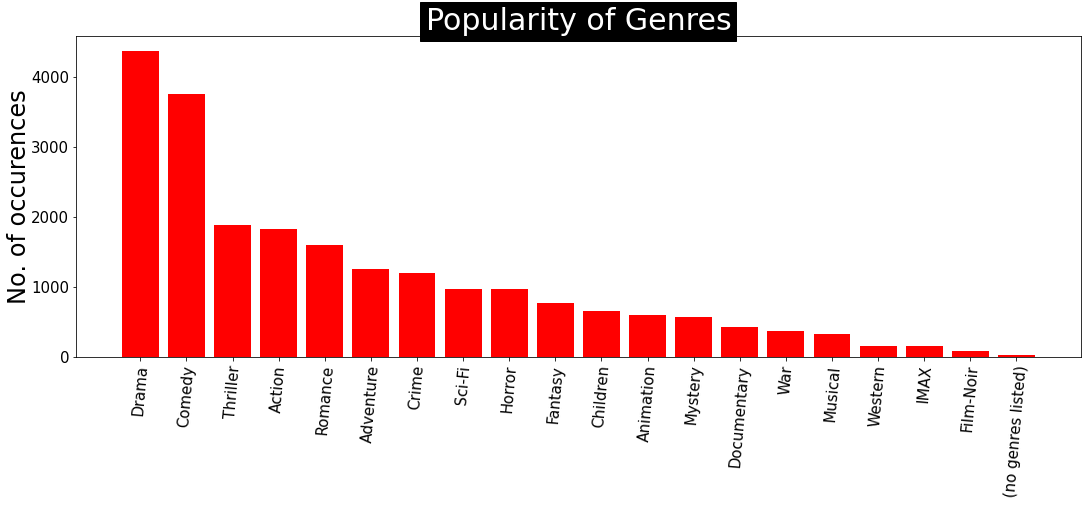

In [40]:
# lets display the same result in the histogram
fig = plt.figure(1, figsize=(18,13))
ax2 = fig.add_subplot(2,1,2)
y_axis = [i[1] for i in trunc_occurences]
x_axis = [k for k,i in enumerate(trunc_occurences)]
x_label = [i[0] for i in trunc_occurences]

plt.xticks(rotation=85, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x_axis, x_label)
plt.ylabel("No. of occurences", fontsize = 24, labelpad = 0)

ax2.bar(x_axis, y_axis, align = 'center', color='r')
plt.title("Popularity of Genres",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 30)

plt.show()

## 6. Regression 

In [41]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

In [42]:
#added some parameters
# https://stackoverflow.com/a/45116022
kf5 = KFold(n_splits = 5, shuffle = True, random_state = 2)

In [43]:
movies_avg_ratings.sample(5)

,movieId,title,genres,Lens#Rating,LensAvgRatings
6977,67295,Kung Fu Panda: Secrets of the Furious Five (2008),Action|Animation|Children|Comedy,4,2.875000
7767,91869,Being Elmo: A Puppeteer's Journey (2011),Documentary,1,3.500000
2643,3544,Shakes the Clown (1992),Comedy,3,2.333333
5941,34520,"Dukes of Hazzard, The (2005)",Action|Adventure|Comedy,12,2.083333
6072,42004,Transamerica (2005),Adventure|Comedy|Drama,6,3.500000


In [44]:
for train_index, test_index in kf5.split(movies_avg_ratings):
    train_x = np.array(movies_avg_ratings.iloc[train_index]['Lens#Rating']).reshape(-1, 1)
    test_x  = np.array(movies_avg_ratings.iloc[test_index]['Lens#Rating']).reshape(-1, 1)
    
    train_y =  movies_avg_ratings.iloc[train_index]['LensAvgRatings']
    test_y  =  movies_avg_ratings.iloc[test_index]['LensAvgRatings']
    
    reg = LinearRegression().fit(train_x, train_y)
    print(reg.score(train_x, train_y), reg.coef_, reg.intercept_)
    
    pred_y = reg.predict(test_x)
    
    print(reg.score(test_x, test_y))

0.017341349743469348 [0.0050214] 3.2125049370500274
0.011357021535449263
0.015054067823733086 [0.00479687] 3.220603600005584
0.018881849490741898
0.014827575077363986 [0.00480362] 3.2096134797584153
0.021168180217097876
0.015816599267849063 [0.00497126] 3.2109882247158392
0.0177463743526014
0.018020885363742245 [0.00510492] 3.2023327948138487
0.007799247075972904


## 7. Classification 

In [45]:
from sklearn.preprocessing import OneHotEncoder, MultiLabelBinarizer

from sklearn.model_selection import KFold
from sklearn import svm

In [46]:
movies_vote = movies_ratings_data.copy()

movies_vote = movies_vote.drop(['timestamp'], axis=1)
movies_vote.sample(5)

,movieId,title,genres,userId,rating,date
72947,6936,Elf (2003),Children|Comedy|Fantasy,232,3.5,"Tuesday, June 26, 2007 08:39:01"
82746,46322,Jet Li's Fearless (Huo Yuan Jia) (2006),Action|Drama,305,4.0,"Friday, April 08, 2016 12:36:50"
19425,802,Phenomenon (1996),Drama|Romance,321,5.0,"Friday, September 20, 1996 04:44:41"
68487,5792,Roger Dodger (2002),Comedy|Drama,356,5.0,"Wednesday, May 20, 2009 11:54:48"
12307,441,Dazed and Confused (1993),Comedy,280,4.5,"Monday, September 24, 2012 07:30:36"


In [47]:
movies_vote['vote'] = movies_vote.apply(lambda row: 1 if row.rating >= 3 else 0, axis=1)
movies_vote.sample(5)

,movieId,title,genres,userId,rating,date,vote
90529,73017,Sherlock Holmes (2009),Action|Crime|Mystery|Thriller,106,5.0,"Friday, July 01, 2016 03:12:25",1
99092,136562,Steve Jobs (2015),Drama,448,3.0,"Saturday, October 29, 2016 01:56:47",1
97250,112552,Whiplash (2014),Drama,212,4.5,"Tuesday, March 21, 2017 11:51:13",1
92297,82667,I Saw the Devil (Akmareul boatda) (2010),Crime|Thriller,599,3.0,"Monday, June 26, 2017 07:51:15",1
79634,33004,"Hitchhiker's Guide to the Galaxy, The (2005)",Adventure|Comedy|Sci-Fi,561,3.0,"Saturday, April 01, 2017 07:03:22",1


In [48]:
movies_vote = movies_vote.drop(['rating'], axis=1)
movies_vote.sample(5)

,movieId,title,genres,userId,date,vote
76687,8644,"I, Robot (2004)",Action|Adventure|Sci-Fi|Thriller,354,"Sunday, January 20, 2008 05:12:18",1
43816,2431,Patch Adams (1998),Comedy|Drama,472,"Friday, August 24, 2012 04:14:33",1
19367,799,"Frighteners, The (1996)",Comedy|Horror|Thriller,414,"Monday, June 19, 2000 01:15:32",1
68217,5669,Bowling for Columbine (2002),Documentary,348,"Tuesday, September 10, 2013 05:19:26",1
3118,95,Broken Arrow (1996),Action|Adventure|Thriller,170,"Monday, August 19, 1996 11:44:06",1


In [49]:
genres_set = set()
global_list = []
for rows in movies_vote.itertuples():
    genres_list = rows.genres.split('|')
    global_list.append(genres_list)
    genres_set.update(genres_list)
print(list(genres_set)) 

['Children', 'War', 'Horror', 'Romance', 'Drama', 'Documentary', 'IMAX', 'Crime', 'Western', 'Thriller', 'Adventure', 'Sci-Fi', 'Film-Noir', 'Action', 'Musical', 'Comedy', '(no genres listed)', 'Animation', 'Mystery', 'Fantasy']


In [50]:
# Creating MultiLabelBinarizer object
one_hot = MultiLabelBinarizer()
one_hot.fit(global_list)

one_hot.classes_

array(['(no genres listed)', 'Action', 'Adventure', 'Animation',
       'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western'], dtype=object)

In [51]:
movies_vote['genres_list'] = movies_vote.apply(lambda row: row.genres.split('|'), axis=1)
movies_vote.sample(5)

,movieId,title,genres,userId,date,vote,genres_list
50645,3005,"Bone Collector, The (1999)",Thriller,249,"Tuesday, December 25, 2012 06:41:06",1,[Thriller]
7253,266,Legends of the Fall (1994),Drama|Romance|War|Western,455,"Wednesday, July 03, 1996 06:21:23",1,"[Drama, Romance, War, Western]"
31473,1405,Beavis and Butt-Head Do America (1996),Adventure|Animation|Comedy|Crime,414,"Monday, June 19, 2000 01:13:57",1,"[Adventure, Animation, Comedy, Crime]"
9487,344,Ace Ventura: Pet Detective (1994),Comedy,26,"Tuesday, July 09, 1996 05:11:26",1,[Comedy]
88710,65230,Marley & Me (2008),Comedy|Drama,41,"Friday, March 25, 2016 03:56:11",1,"[Comedy, Drama]"


In [52]:
movies_vote['genres_one_hot'] = movies_vote.apply(lambda row: one_hot.transform(row.genres_list)[0][0], axis=1)
movies_vote.sample(5)

E:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:995: UserWarning: unknown class(es) ['A', 'C', 'F', 'a', 'd', 'e', 'h', 'i', 'l', 'm', 'n', 'o', 'r', 's', 't', 'u', 'v', 'y'] will be ignored
  .format(sorted(unknown, key=str)))
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:995: UserWarning: unknown class(es) ['A', 'C', 'F', 'a', 'd', 'e', 'h', 'i', 'l', 'n', 'r', 's', 't', 'u', 'v', 'y'] will be ignored
  .format(sorted(unknown, key=str)))
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:995: UserWarning: unknown class(es) ['C', 'R', 'a', 'c', 'd', 'e', 'm', 'n', 'o', 'y'] will be ignored
  .format(sorted(unknown, key=str)))
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:995: UserWarning: unknown class(es) ['C', 'D', 'R', 'a', 'c', 'd', 'e', 'm', 'n', 'o', 'r', 'y'] will be ignored
  .format(sorted(unknown, key=str)))
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\preproces

E:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:995: UserWarning: unknown class(es) ['-', 'A', 'C', 'F', 'S', 'c', 'e', 'i', 'm', 'n', 'o', 'r', 't'] will be ignored
  .format(sorted(unknown, key=str)))
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:995: UserWarning: unknown class(es) ['H', 'o', 'r'] will be ignored
  .format(sorted(unknown, key=str)))
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:995: UserWarning: unknown class(es) ['A', 'C', 'c', 'd', 'e', 'h', 'i', 'l', 'n', 'o', 'r', 't'] will be ignored
  .format(sorted(unknown, key=str)))
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:995: UserWarning: unknown class(es) ['C', 'H', 'T', 'd', 'e', 'h', 'i', 'l', 'm', 'o', 'r', 'y'] will be ignored
  .format(sorted(unknown, key=str)))
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:995: UserWarning: unknown class(es) ['F', 'H', 'M', 'a', 'e', 'n'

E:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:995: UserWarning: unknown class(es) ['A', 'C', 'T', 'c', 'd', 'e', 'h', 'i', 'l', 'm', 'n', 'o', 'r', 't', 'y'] will be ignored
  .format(sorted(unknown, key=str)))
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:995: UserWarning: unknown class(es) ['-', 'F', 'H', 'S', 'T', 'c', 'e', 'h', 'i', 'l', 'o', 'r'] will be ignored
  .format(sorted(unknown, key=str)))
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:995: UserWarning: unknown class(es) ['D', 'M', 'R', 'T', 'a', 'c', 'e', 'h', 'i', 'l', 'm', 'n', 'o', 'r', 's', 't', 'y'] will be ignored
  .format(sorted(unknown, key=str)))
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:995: UserWarning: unknown class(es) ['A', 'C', 'D', 'a', 'c', 'd', 'e', 'i', 'm', 'n', 'o', 'r', 't', 'y'] will be ignored
  .format(sorted(unknown, key=str)))
E:\ProgramData\Anaconda3\lib\site-packages\sklearn

E:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:995: UserWarning: unknown class(es) ['-', 'A', 'C', 'F', 'S', 'c', 'd', 'e', 'i', 'm', 'n', 'o', 'r', 't', 'u', 'v', 'y'] will be ignored
  .format(sorted(unknown, key=str)))
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:995: UserWarning: unknown class(es) ['-', 'D', 'F', 'M', 'R', 'S', 'T', 'a', 'c', 'e', 'h', 'i', 'l', 'm', 'n', 'o', 'r', 's', 't', 'y'] will be ignored
  .format(sorted(unknown, key=str)))
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:995: UserWarning: unknown class(es) ['A', 'C', 'W', 'a', 'c', 'd', 'e', 'i', 'm', 'n', 'o', 'r', 't', 'u', 'v', 'y'] will be ignored
  .format(sorted(unknown, key=str)))
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:995: UserWarning: unknown class(es) ['A', 'c', 'd', 'e', 'i', 'n', 'o', 'r', 't', 'u', 'v'] will be ignored
  .format(sorted(unknown, key=str)))
E:\ProgramData\Anaco

E:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:995: UserWarning: unknown class(es) ['-', 'C', 'F', 'N', 'e', 'i', 'l', 'm', 'o', 'r'] will be ignored
  .format(sorted(unknown, key=str)))
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:995: UserWarning: unknown class(es) ['C', 'W', 'd', 'e', 'h', 'i', 'l', 'm', 'n', 'o', 'r', 's', 't', 'y'] will be ignored
  .format(sorted(unknown, key=str)))
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:995: UserWarning: unknown class(es) ['C', 'F', 'R', 'a', 'c', 'd', 'e', 'h', 'i', 'l', 'm', 'n', 'o', 'r', 's', 't', 'y'] will be ignored
  .format(sorted(unknown, key=str)))
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:995: UserWarning: unknown class(es) ['C', 'R', 'a', 'c', 'd', 'e', 'h', 'i', 'l', 'm', 'n', 'o', 'r', 'y'] will be ignored
  .format(sorted(unknown, key=str)))
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\

E:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:995: UserWarning: unknown class(es) ['A', 'C', 'F', 'H', 'a', 'c', 'd', 'e', 'i', 'm', 'n', 'o', 'r', 's', 't', 'y'] will be ignored
  .format(sorted(unknown, key=str)))
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:995: UserWarning: unknown class(es) ['A', 'D', 'W', 'a', 'c', 'd', 'e', 'i', 'm', 'n', 'o', 'r', 't', 'u', 'v'] will be ignored
  .format(sorted(unknown, key=str)))
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:995: UserWarning: unknown class(es) ['A', 'D', 'M', 'R', 'T', 'a', 'c', 'e', 'h', 'i', 'l', 'm', 'n', 'o', 'r', 's', 't', 'y'] will be ignored
  .format(sorted(unknown, key=str)))
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:995: UserWarning: unknown class(es) ['C', 'F', 'R', 'a', 'c', 'd', 'e', 'm', 'n', 'o', 's', 't', 'y'] will be ignored
  .format(sorted(unknown, key=str)))
E:\ProgramData\Anaconda3\lib\s

E:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:995: UserWarning: unknown class(es) ['C', 'D', 'M', 'a', 'c', 'd', 'e', 'i', 'l', 'm', 'o', 'r', 's', 'u', 'y'] will be ignored
  .format(sorted(unknown, key=str)))
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:995: UserWarning: unknown class(es) ['A', 'F', 'M', 'a', 'c', 'd', 'e', 'i', 'l', 'n', 'r', 's', 't', 'u', 'v', 'y'] will be ignored
  .format(sorted(unknown, key=str)))
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:995: UserWarning: unknown class(es) ['-', 'D', 'F', 'M', 'S', 'T', 'a', 'c', 'e', 'h', 'i', 'l', 'm', 'r', 's', 't', 'y'] will be ignored
  .format(sorted(unknown, key=str)))
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:995: UserWarning: unknown class(es) ['-', 'A', 'C', 'F', 'S', 'W', 'c', 'd', 'e', 'i', 'm', 'n', 'o', 'r', 's', 't', 'u', 'v', 'y'] will be ignored
  .format(sorted(unknown, key=str)))
E:\Pr

E:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:995: UserWarning: unknown class(es) ['F', 'H', 'T', 'a', 'e', 'h', 'i', 'l', 'n', 'o', 'r', 's', 't', 'y'] will be ignored
  .format(sorted(unknown, key=str)))
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:995: UserWarning: unknown class(es) ['H', 'W', 'e', 'n', 'o', 'r', 's', 't'] will be ignored
  .format(sorted(unknown, key=str)))
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:995: UserWarning: unknown class(es) ['A', 'F', 'H', 'a', 'c', 'd', 'e', 'i', 'n', 'o', 'r', 's', 't', 'u', 'v', 'y'] will be ignored
  .format(sorted(unknown, key=str)))
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:995: UserWarning: unknown class(es) ['-', 'A', 'F', 'R', 'S', 'T', 'a', 'c', 'd', 'e', 'h', 'i', 'l', 'm', 'n', 'o', 'r', 's', 't', 'u', 'v', 'y'] will be ignored
  .format(sorted(unknown, key=str)))
E:\ProgramData\Anaconda3\lib\site-packag

E:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:995: UserWarning: unknown class(es) ['A', 'D', 'R', 'T', 'a', 'c', 'e', 'h', 'i', 'l', 'm', 'n', 'o', 'r', 't'] will be ignored
  .format(sorted(unknown, key=str)))
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:995: UserWarning: unknown class(es) ['A', 'H', 'M', 'T', 'a', 'e', 'h', 'i', 'l', 'm', 'n', 'o', 'r', 's', 't', 'y'] will be ignored
  .format(sorted(unknown, key=str)))
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:995: UserWarning: unknown class(es) ['A', 'C', 'D', 'a', 'd', 'e', 'h', 'i', 'l', 'm', 'n', 'o', 'r', 't', 'u', 'v', 'y'] will be ignored
  .format(sorted(unknown, key=str)))
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:995: UserWarning: unknown class(es) ['-', 'A', 'F', 'S', 'T', 'c', 'd', 'e', 'h', 'i', 'l', 'n', 'r', 't', 'u', 'v'] will be ignored
  .format(sorted(unknown, key=str)))
E:\ProgramData\Anaco

E:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:995: UserWarning: unknown class(es) ['A', 'C', 'R', 'a', 'c', 'd', 'e', 'i', 'm', 'n', 'o', 'r', 't', 'y'] will be ignored
  .format(sorted(unknown, key=str)))
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:995: UserWarning: unknown class(es) ['A', 'C', 'd', 'e', 'i', 'm', 'n', 'o', 'r', 't', 'u', 'v', 'y'] will be ignored
  .format(sorted(unknown, key=str)))
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:995: UserWarning: unknown class(es) ['A', 'C', 'M', 'R', 'T', 'a', 'c', 'e', 'h', 'i', 'l', 'm', 'n', 'o', 'r', 's', 't', 'y'] will be ignored
  .format(sorted(unknown, key=str)))
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:995: UserWarning: unknown class(es) ['-', 'F', 'R', 'S', 'a', 'c', 'e', 'i', 'm', 'n', 'o'] will be ignored
  .format(sorted(unknown, key=str)))
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\preproces

E:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:995: UserWarning: unknown class(es) ['D', 'F', 'H', 'M', 'T', 'a', 'e', 'h', 'i', 'l', 'm', 'n', 'o', 'r', 's', 't', 'y'] will be ignored
  .format(sorted(unknown, key=str)))
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:995: UserWarning: unknown class(es) ['D', 'F', 'M', 'R', 'T', 'a', 'c', 'e', 'h', 'i', 'l', 'm', 'n', 'o', 'r', 's', 't', 'y'] will be ignored
  .format(sorted(unknown, key=str)))
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:995: UserWarning: unknown class(es) ['-', 'A', 'F', 'H', 'S', 'a', 'c', 'i', 'm', 'n', 'o', 'r', 's', 't', 'y'] will be ignored
  .format(sorted(unknown, key=str)))
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:995: UserWarning: unknown class(es) ['D', 'W', 'a', 'c', 'e', 'm', 'n', 'o', 'r', 't', 'u', 'y'] will be ignored
  .format(sorted(unknown, key=str)))
E:\ProgramData\Anaconda3\lib\s

E:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:995: UserWarning: unknown class(es) ['A', 'C', 'F', 'M', 'a', 'c', 'd', 'e', 'i', 'l', 'm', 'n', 'o', 's', 't', 'u', 'y'] will be ignored
  .format(sorted(unknown, key=str)))
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:995: UserWarning: unknown class(es) ['A', 'C', 'M', 'c', 'd', 'e', 'h', 'i', 'l', 'm', 'n', 'o', 'r', 's', 't', 'u', 'v', 'y'] will be ignored
  .format(sorted(unknown, key=str)))
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:995: UserWarning: unknown class(es) ['A', 'D', 'H', 'a', 'c', 'i', 'm', 'n', 'o', 'r', 't'] will be ignored
  .format(sorted(unknown, key=str)))
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:995: UserWarning: unknown class(es) ['M', 'R', 'W', 'a', 'c', 'e', 'i', 'l', 'm', 'n', 'o', 'r', 's', 't', 'u'] will be ignored
  .format(sorted(unknown, key=str)))
E:\ProgramData\Anaconda3\lib\site-p

E:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:995: UserWarning: unknown class(es) ['A', 'C', 'I', 'M', 'X', 'c', 'e', 'i', 'm', 'n', 'o', 'r', 't'] will be ignored
  .format(sorted(unknown, key=str)))
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:995: UserWarning: unknown class(es) ['A', 'C', 'F', 'W', 'a', 'd', 'e', 'h', 'i', 'l', 'm', 'n', 'o', 'r', 's', 't', 'u', 'v', 'y'] will be ignored
  .format(sorted(unknown, key=str)))
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:995: UserWarning: unknown class(es) ['-', 'A', 'F', 'H', 'M', 'S', 'T', 'c', 'd', 'e', 'h', 'i', 'l', 'n', 'o', 'r', 's', 't', 'u', 'v', 'y'] will be ignored
  .format(sorted(unknown, key=str)))
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:995: UserWarning: unknown class(es) ['A', 'C', 'D', 'T', 'W', 'a', 'c', 'e', 'h', 'i', 'l', 'm', 'n', 'o', 'r', 't'] will be ignored
  .format(sorted(unknown, key=st

E:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:995: UserWarning: unknown class(es) ['A', 'D', 'F', 'I', 'M', 'X', 'a', 'd', 'e', 'm', 'n', 'r', 's', 't', 'u', 'v', 'y'] will be ignored
  .format(sorted(unknown, key=str)))
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:995: UserWarning: unknown class(es) ['A', 'C', 'F', 'R', 'a', 'c', 'd', 'e', 'm', 'n', 'o', 'r', 's', 't', 'u', 'v', 'y'] will be ignored
  .format(sorted(unknown, key=str)))
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:995: UserWarning: unknown class(es) ['A', 'F', 'W', 'a', 'c', 'd', 'e', 'i', 'n', 'o', 'r', 's', 't', 'u', 'v', 'y'] will be ignored
  .format(sorted(unknown, key=str)))
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:995: UserWarning: unknown class(es) ['A', 'C', 'D', 'W', 'a', 'c', 'e', 'i', 'm', 'n', 'o', 'r', 's', 't'] will be ignored
  .format(sorted(unknown, key=str)))
E:\ProgramData\Anaco

E:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:995: UserWarning: unknown class(es) ['-', 'C', 'F', 'M', 'S', 'W', 'a', 'c', 'd', 'e', 'i', 'l', 'm', 'n', 'o', 'r', 's', 't', 'u', 'y'] will be ignored
  .format(sorted(unknown, key=str)))
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:995: UserWarning: unknown class(es) ['A', 'F', 'I', 'M', 'R', 'X', 'a', 'c', 'd', 'e', 'i', 'm', 'n', 'o', 'r', 's', 't', 'u', 'v', 'y'] will be ignored
  .format(sorted(unknown, key=str)))
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:995: UserWarning: unknown class(es) ['A', 'F', 'I', 'M', 'R', 'T', 'X', 'a', 'c', 'e', 'h', 'i', 'l', 'm', 'n', 'o', 'r', 's', 't', 'y'] will be ignored
  .format(sorted(unknown, key=str)))
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:995: UserWarning: unknown class(es) ['-', 'A', 'C', 'D', 'F', 'I', 'M', 'S', 'T', 'X', 'a', 'c', 'e', 'h', 'i', 'l', 'm', 'n', 'o'

E:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:995: UserWarning: unknown class(es) ['A', 'C', 'F', 'M', 'R', 'a', 'c', 'd', 'e', 'i', 'l', 'm', 'n', 'o', 'r', 's', 't', 'u', 'v', 'y'] will be ignored
  .format(sorted(unknown, key=str)))
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:995: UserWarning: unknown class(es) ['D', 'H', 'R', 'a', 'c', 'e', 'm', 'n', 'o', 'r'] will be ignored
  .format(sorted(unknown, key=str)))
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:995: UserWarning: unknown class(es) ['A', 'F', 'I', 'M', 'X', 'a', 'c', 'i', 'm', 'n', 'o', 's', 't', 'y'] will be ignored
  .format(sorted(unknown, key=str)))
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:995: UserWarning: unknown class(es) ['-', 'A', 'F', 'I', 'M', 'R', 'S', 'X', 'a', 'c', 'd', 'e', 'i', 'm', 'n', 'o', 'r', 't', 'u', 'v'] will be ignored
  .format(sorted(unknown, key=str)))
E:\ProgramData\Anaco

,movieId,title,genres,userId,date,vote,genres_list,genres_one_hot
29625,1301,Forbidden Planet (1956),Drama|Sci-Fi,309,"Sunday, September 11, 2005 10:53:13",1,"[Drama, Sci-Fi]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
73660,7132,"Night at the Opera, A (1935)",Comedy|Musical|Romance,474,"Monday, January 23, 2006 12:09:00",1,"[Comedy, Musical, Romance]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
65060,4993,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy,352,"Monday, May 01, 2017 04:49:17",1,"[Adventure, Fantasy]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
25323,1200,Aliens (1986),Action|Adventure|Horror|Sci-Fi,328,"Sunday, May 07, 2017 09:37:15",1,"[Action, Adventure, Horror, Sci-Fi]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
27742,1249,"Femme Nikita, La (Nikita) (1990)",Action|Crime|Romance|Thriller,414,"Thursday, June 22, 2000 08:49:14",1,"[Action, Crime, Romance, Thriller]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [53]:
movies_vote = movies_vote.drop(['genres', 'genres_list'], axis=1)
movies_vote.sample(5)

,movieId,title,userId,date,vote,genres_one_hot
44950,2558,Forces of Nature (1999),575,"Wednesday, May 12, 1999 07:01:15",1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
38793,2036,Blank Check (1994),19,"Monday, August 07, 2000 11:18:59",0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
50339,2987,Who Framed Roger Rabbit? (1988),483,"Saturday, July 12, 2008 09:36:17",1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
70006,6188,Old School (2003),354,"Monday, January 21, 2008 04:11:09",0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
76314,8529,"Terminal, The (2004)",438,"Thursday, January 13, 2005 07:23:34",0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


### 7.1 SVM

In [ ]:
kf5 = KFold(n_splits = 5, shuffle = True, random_state = 2)

In [ ]:
movies_vote.dtypes

In [ ]:
movies_vote['feature'] = movies_vote.apply(lambda row: np.append(row.genres_one_hot, row.userId), axis=1)
movies_vote.sample(5)

In [ ]:
for rows in movies_vote.itertuples():
    if len(row.feature) != 21:
        print(row)
        break

In [ ]:
for train_index, test_index in kf5.split(movies_vote):
    train_x = np.array(movies_vote.iloc[train_index]['feature'])
    test_x  = np.array(movies_vote.iloc[test_index]['feature'])
    
    train_y =  movies_vote.iloc[train_index]['vote']
    test_y  =  movies_vote.iloc[test_index]['vote']
    
    clf = svm.SVC()
    # ValueError: setting an array element with a sequence. 
    # while using SVM in scikit-learn https://stackoverflow.com/a/53303302/2049763
    clf.fit(list(train_x), train_y)    
    pred_y = clf.predict(list(test_x))
    
    print("Accuracy:", round( sum(pred_y == test_y) * 100 / len(test_y) , 3))